In [4]:
import numpy as np 
from matplotlib import pyplot as plt 
from FlagRepp import FlagRepp

In [5]:
def plot_it(basis, D, fig, ax_num, title, m1= 10):
    normal = (np.eye(3) - basis@basis.T)@ np.random.normal(0,1,(3,1))
    
    max_x = np.max([D[0,:].max(), -D[0,:].min()])
    max_y = np.max([D[1,:].max(), -D[1,:].min()])
    max_z = np.max([D[2,:].max(), -D[2,:].min()])

    max_all = np.max([max_x, max_y, max_z])

    # Generate x values for the line
    t = np.linspace(-max_all, max_all, 100)  # Adjust range as needed

    # Calculate slope (m) and line equation y = mx
    line = basis[:,[0]] * t


    # Create a meshgrid for x and y
    x = np.linspace(-max_x, max_x, 30)
    y = np.linspace(-max_y, max_y, 30)
    x, y = np.meshgrid(x, y)

    # Calculate z values from the plane equation: z = -(a*x + b*y) / c
    # Handle the case when c = 0 to avoid division by zero
    z = -(normal[0] * x + normal[1] * y) / normal[2] if normal[2] != 0 else np.zeros_like(x)


    # Enable interactive Matplotlib mode in Jupyter Notebook
    ax = fig.add_subplot(1,3,ax_num,projection='3d')
    ax.plot_surface(x, y, z, alpha=0.2, edgecolor='none', color = 'tab:orange')
    ax.scatter(D[0,m1:], D[1,m1:], D[2,m1:], color = 'tab:orange', s = 6)
    ax.scatter(D[0,:m1], D[1,:m1], D[2,:m1], color = 'tab:blue', s = 6)
    ax.plot(line[0,:], line[1,:], line[2,:])

    ax.axes.set_xlim3d(left=-2.5, right=2.5) 
    ax.axes.set_ylim3d(bottom=-2.5, top=2.5) 
    ax.axes.set_zlim3d(bottom=-2.5, top=2.5) 

    # Get rid of the ticks
    ax.set_xticks([]) 
    ax.set_yticks([]) 
    ax.set_zticks([])
    # ax.set_axis_off()

    ax.view_init(31,-132)#(11,173)#(-22, 4) 

    ax.title.set_text(title)

    ax.grid(False)

In [6]:
np.random.seed(4) #4

U = np.linalg.svd(np.random.normal(0,1,(3,3)))[0]
basis = U[:,:2]
normal = U[:,[2]]

m1 = 10
m2 = 35

B1 = basis[:,[0]] @ np.random.normal(0,1,(1,m1))
B2 = basis @ np.random.normal(0,1,(2,m2))

D = np.block([B1,B2])

In [7]:

svd_basis = np.linalg.svd(D)[0][:,:2]

my_fd = FlagRepp([np.arange(m1), np.arange(m1+m2)], [1,2])
fd_basis = my_fd.fit_transform(D)[0]

qr_basis = np.linalg.qr(D)[0][:,:2]

In [8]:
svd_basis, fd_basis, qr_basis

(array([[ 0.31594035, -0.7781598 ],
        [ 0.86370439, -0.00089827],
        [-0.39267853, -0.6280657 ]]),
 array([[-0.40345397,  0.7365975 ],
        [-0.85806121, -0.09857506],
        [ 0.31773552,  0.66910917]]),
 array([[-0.40345397,  0.88236386],
        [-0.85806121, -0.27293702],
        [ 0.31773552,  0.38332676]]))

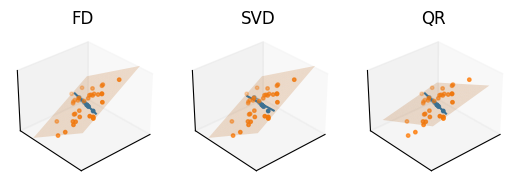

In [9]:
# %matplotlib inline  
# %matplotlib widget
# %pylab
fig = plt.figure()
plot_it(fd_basis, D, fig, 1, 'FD')
plot_it(svd_basis, D, fig, 2, 'SVD')
plot_it(qr_basis, D, fig, 3, 'QR')
# plt.show()
plt.savefig('../results/advantage0.pdf', bbox_inches = 'tight')

In [19]:
import imageio.v3 as iio
import matplotlib.pyplot as plt
import os
from skimage.transform import resize

def relative_log_mse(D_rec, D_true):
    return 10*np.log10(np.linalg.norm(D_rec - D_true, 'fro')**2/(np.linalg.norm(D_true, 'fro')**2))

def load_yale_faces(dataset_path, face_ids, illumination_ids):
    """
    Loads face images from the Yale Face Database with specified face IDs and illumination IDs.
    
    :param dataset_path: Path to the Yale Face Database.
    :param face_ids: List of face identifiers (e.g., 'subject01').
    :param illumination_ids: List of illumination identifiers for each face (e.g., 'centerlight').
    :return: A list of loaded images and their titles.
    """
    images = []
    titles = []

    for face_id, illumination_id in zip(face_ids, illumination_ids):
        filename = f"{face_id}.{illumination_id}"  # No file extension
        filepath = os.path.join(dataset_path, filename)

        if os.path.exists(filepath):

            img = iio.imread(filepath)[0,:,:]
            # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = resize(img, (img.shape[0] // 4, img.shape[1] // 4))

            # width, height = img.shape

            # new_width = width // 2
            # new_height = height // 2
            # downsampled_img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_AREA)
           
            if img is not None:
                images.append(img)
                titles.append(f"{face_id} - {illumination_id}")
            else:
                print(f"Failed to load image: {filepath}")
        else:
            print(f"File not found: {filepath}")

    return images, titles


def display_faces(images, titles):
    """
    Displays the loaded images with their respective titles.
    
    :param images: List of face images.
    :param titles: List of titles for the images.
    """
    plt.figure(figsize=(10, 5))
    
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img, cmap="gray")
        # plt.title(title)
        plt.axis("off")

    plt.tight_layout()
    plt.show()


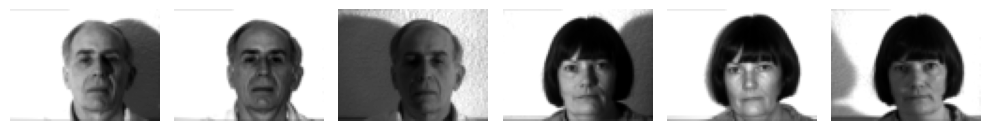

In [20]:
dataset_path = "data/YFDB/"  # Replace with the actual path to your dataset
face_ids = ["subject05", "subject05", "subject05", "subject11", "subject11", "subject11"]  
illumination_ids = ["leftlight","centerlight","rightlight","leftlight","centerlight","rightlight"]  


images, titles = load_yale_faces(dataset_path, face_ids, illumination_ids)
display_faces(images, titles)


In [12]:
D = np.vstack([img.flatten() for img in images]).T
D.shape

(4800, 6)

In [42]:
images_tilde = {}
Qs_tilde = {}

In [43]:
images_tilde['True'] = images

my_fr = FlagRepp(Aset = [np.arange(3), np.arange(6)], flag_type = [1,2])
Q,R = my_fr.fit_transform(D)
Dtilde = Q @ R
images_tilde['FD'] = [d.reshape((243//4,320//4)) for d in Dtilde.T]
Qs_tilde['FD'] = [d.reshape((243//4,320//4)) for d in Q.T]

U = np.linalg.svd(D)[0][:,:2]
Dtilde = U @ U.T @ D
images_tilde['SVD'] = [d.reshape((243//4,320//4)) for d in Dtilde.T]
Qs_tilde['SVD'] = [d.reshape((243//4,320//4)) for d in U.T]

Q = np.linalg.qr(D)[0][:,:2]
Dtilde = Q @ Q.T @ D
images_tilde['QR'] = [d.reshape((243//4,320//4)) for d in Dtilde.T]
Qs_tilde['QR'] = [d.reshape((243//4,320//4)) for d in Q.T]

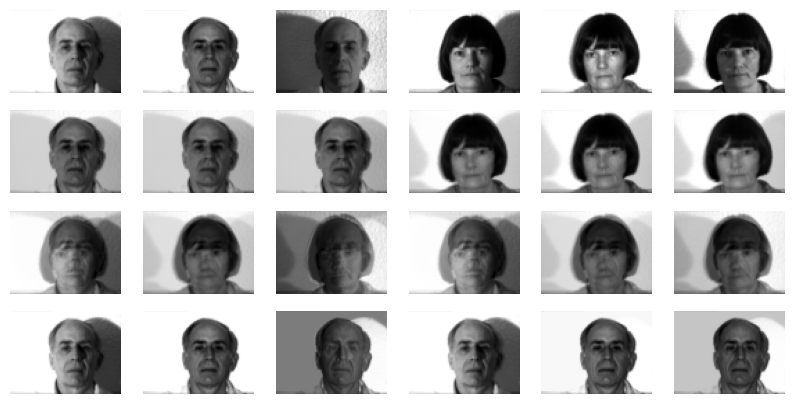

In [58]:
fig, ax = plt.subplots(4,6,figsize=(10, 5))

for i, method in enumerate(images_tilde.keys()):
    imags = images_tilde[method]
    for j, img in enumerate(imags):
        ax[i,j].imshow(img, cmap="gray")
        ax[i,j].set_axis_off()

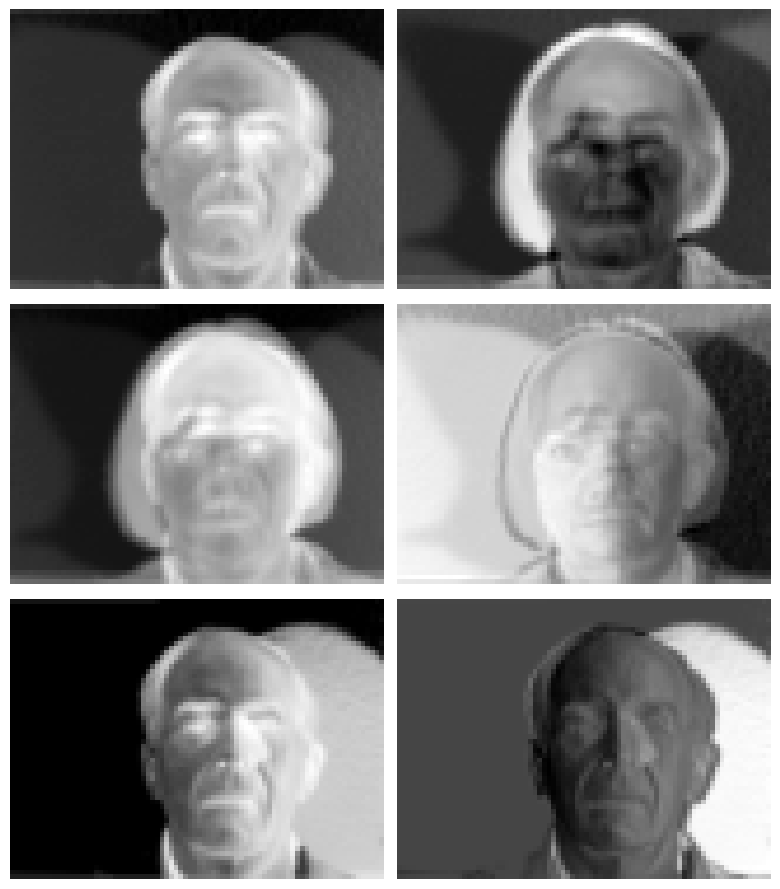

In [56]:
fig, ax = plt.subplots(3,2,figsize=(8,9))

for i, method in enumerate(Qs_tilde.keys()):
    imags = Qs_tilde[method]
    for j, img in enumerate(imags):
        ax[i,j].imshow(img, cmap="gray")
        ax[i,j].set_axis_off()
plt.tight_layout()